In [1]:
import sys, re
import matplotlib.pyplot as plt

In [2]:
def get_stat(stat_name, source="fastclick-varied-cbr-rates.csv"):
    stat = []
    with open(source) as file:
        for line in file:
            if re.search(stat_name, line):
                stat.append(line.strip().split(',')[1])
    
    return list(map(lambda x:float(x), stat[:-1]))

In [3]:
def plot_stat(stat_name, ax, source):
    stat = get_stat(stat_name, source)
    ax.plot(stat)
    ax.set_title(stat_name)

In [4]:
def plot_stats(stat_names, source="fastclick-varied-cbr-rates.csv"):
    i = 1
    fig, ax = plt.subplots(len(stat_names),1)
    for s in stat_names:
        ax = plt.subplot(len(stat_names),1, i)
        plot_stat(s, ax, source)
        i+=1
    fig.tight_layout()

# Testbed setup (Freisa server)
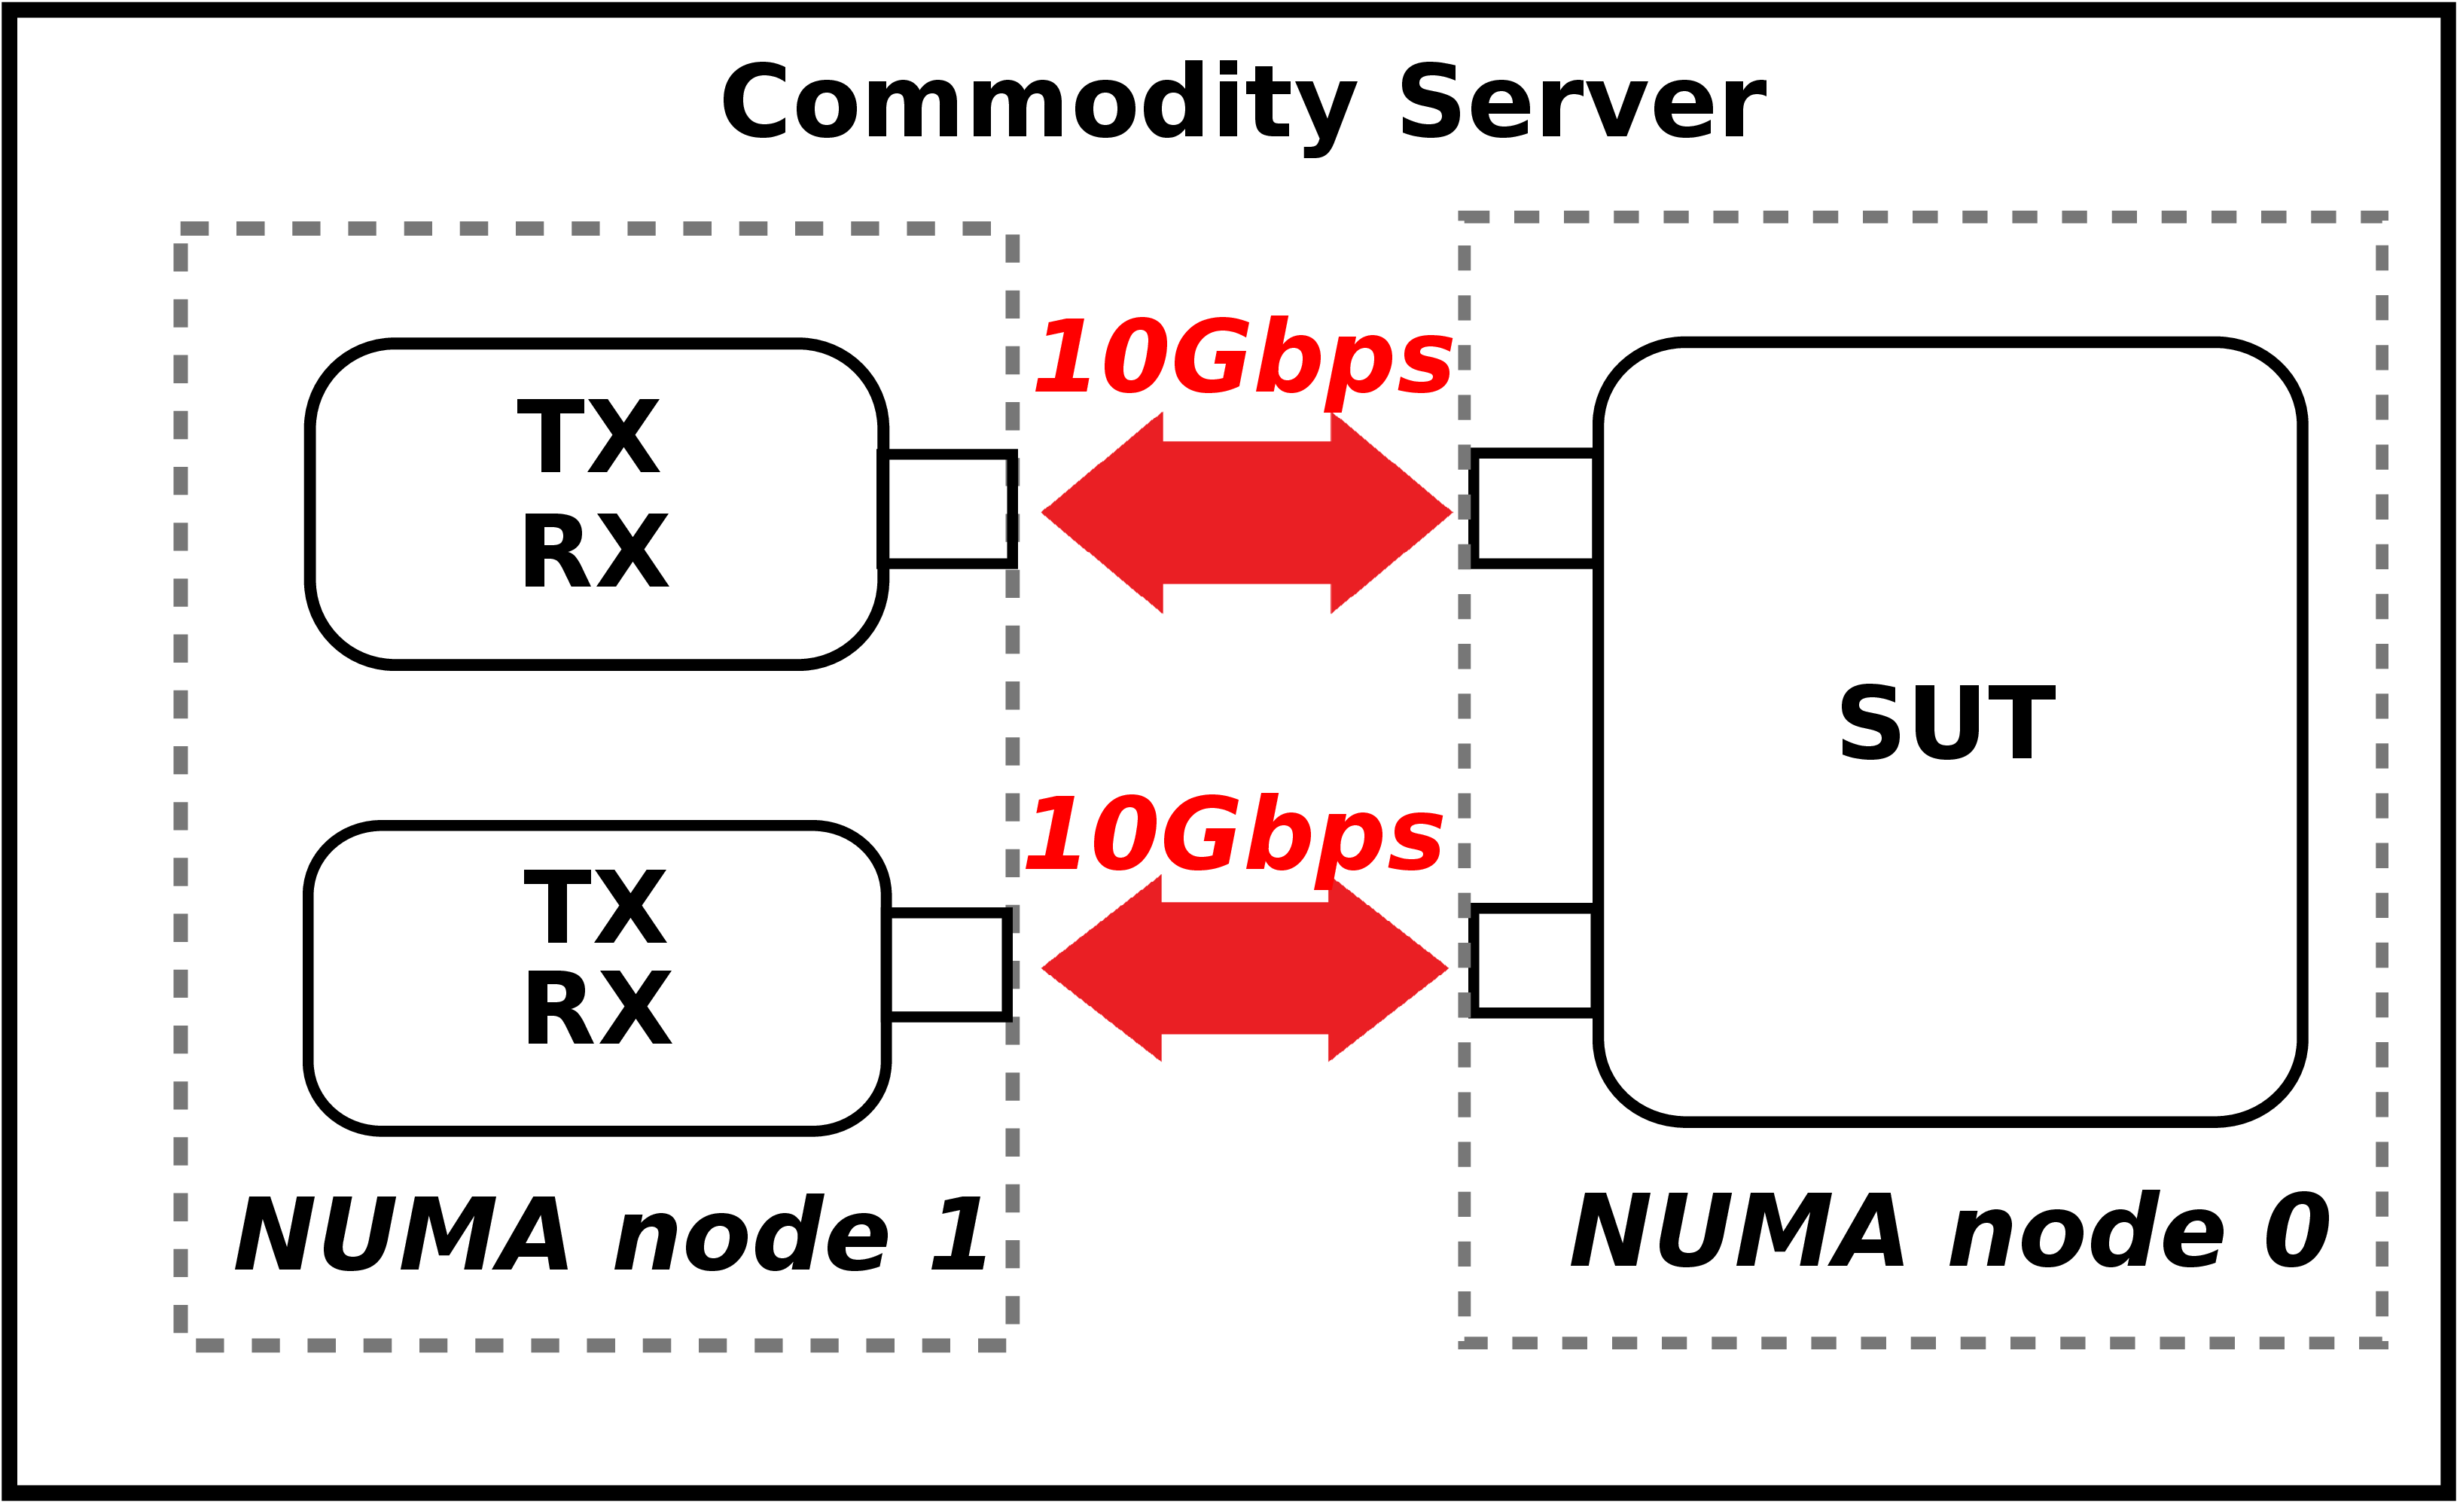

# Switch experiments
### A single instance of FastClick for traffic forwarding

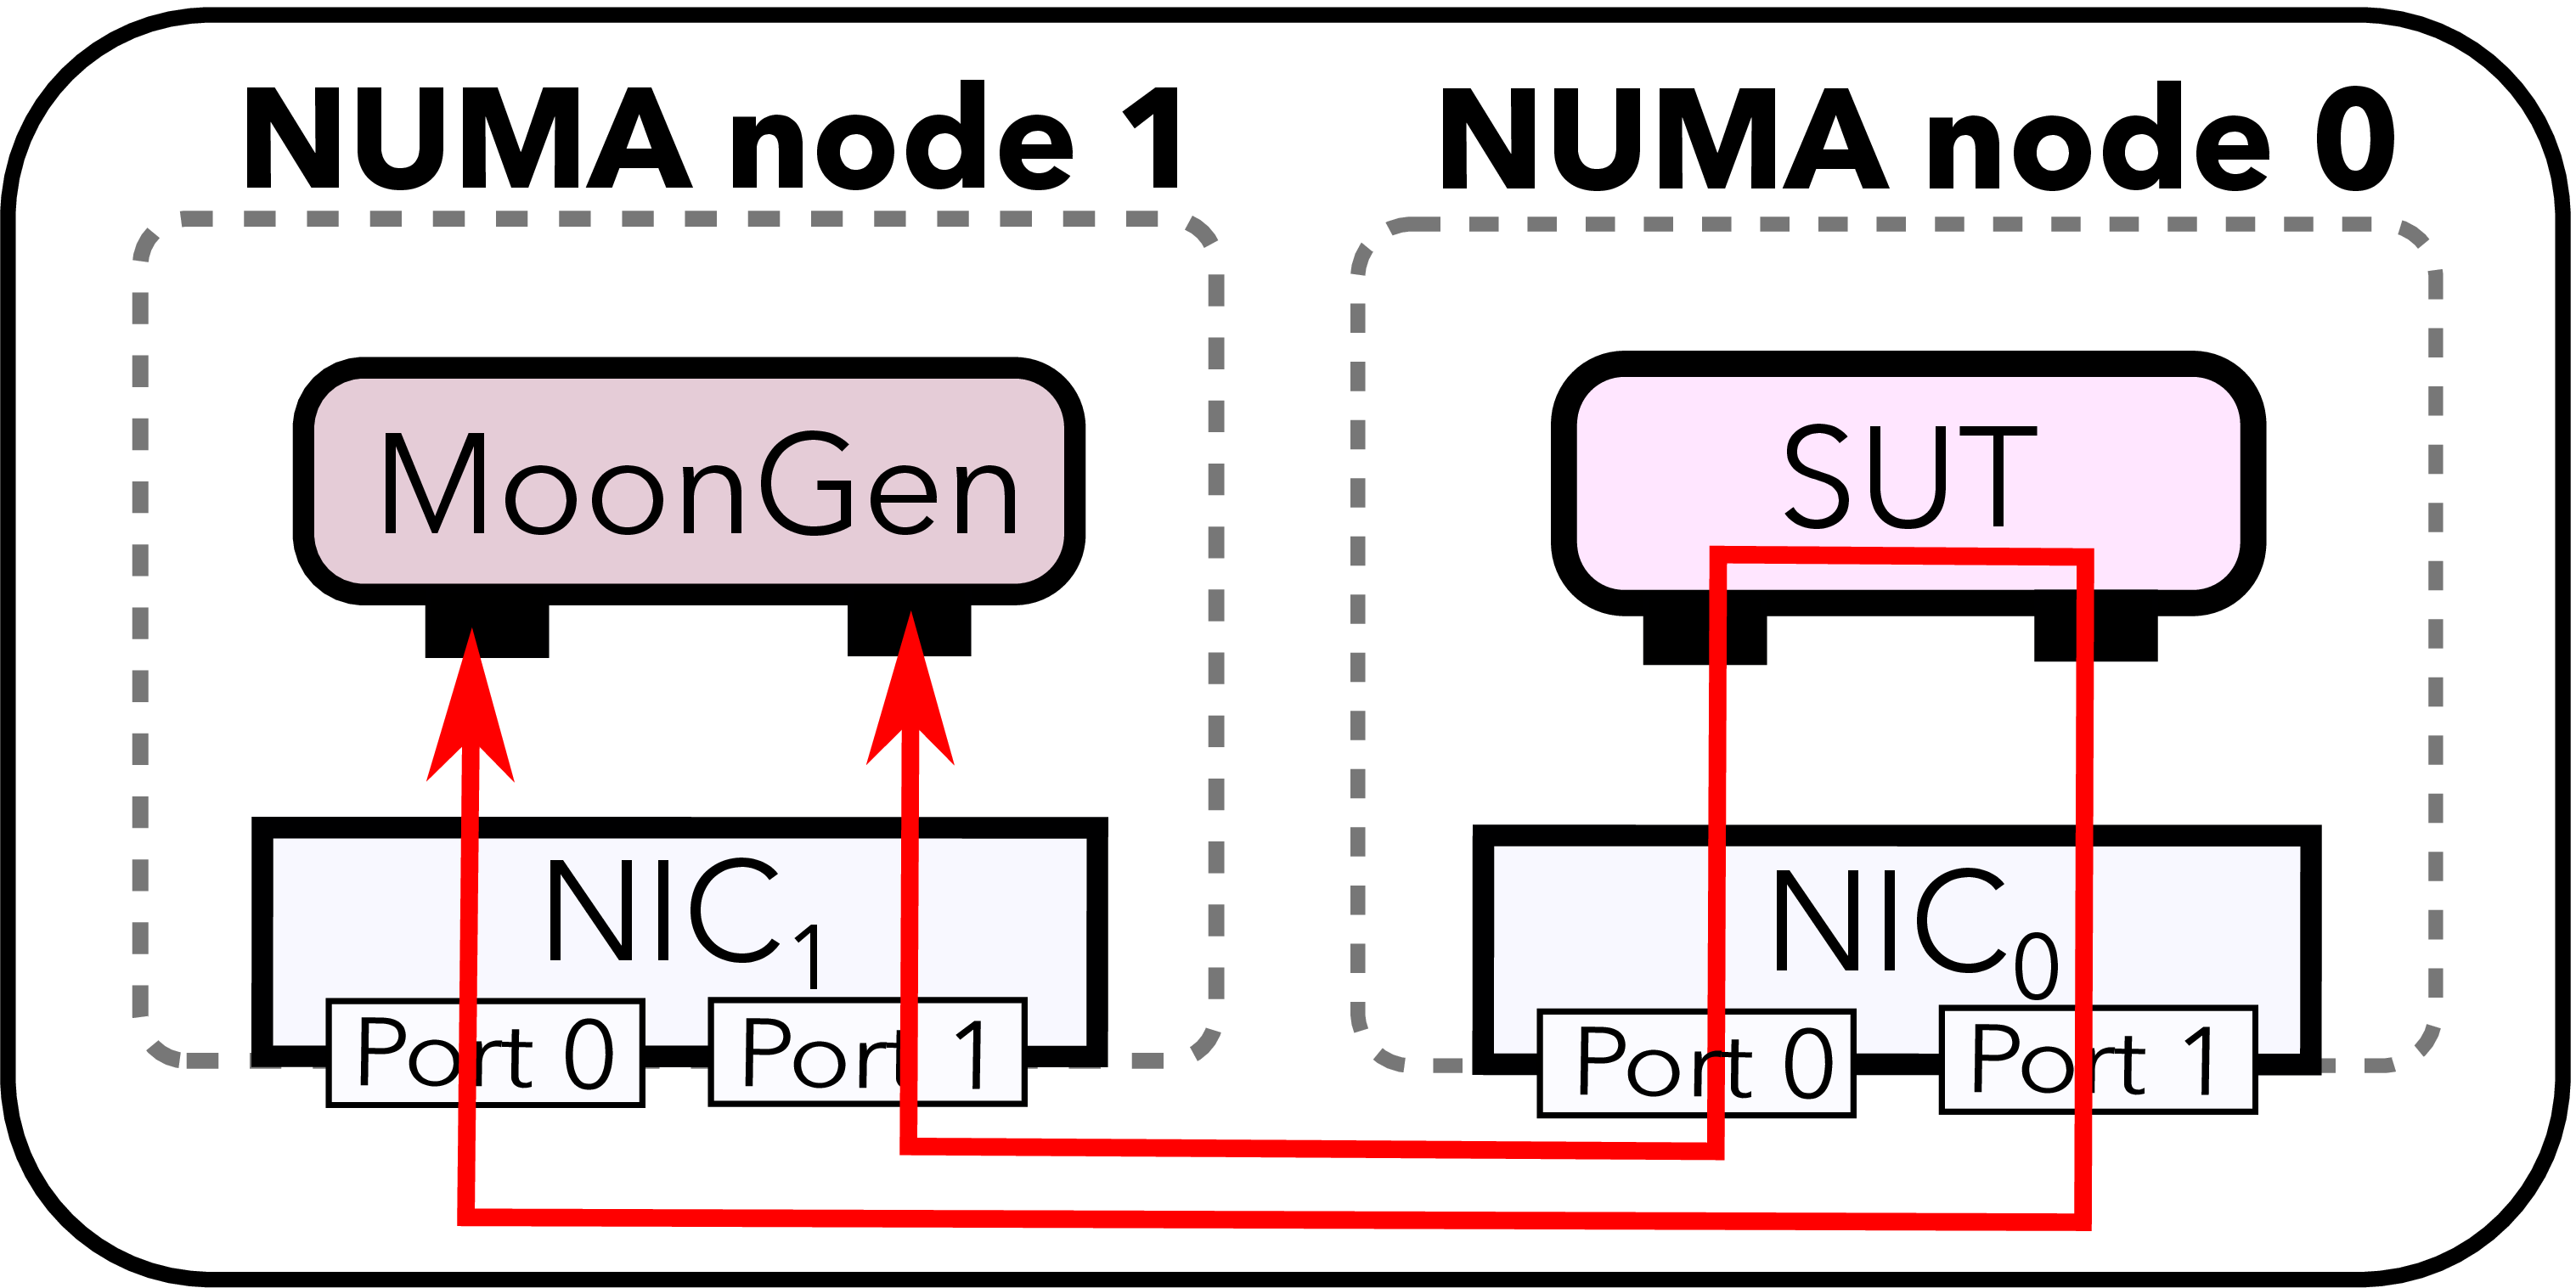

## Off-On-Off experiment @ 5 Gbps
#### Instructions and branch features

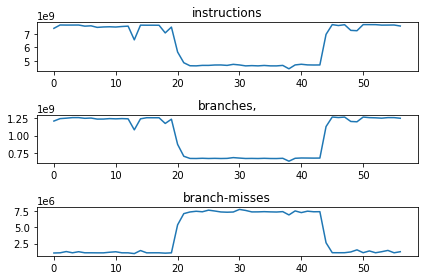

In [5]:
plot_stats(["instructions", "branches,", "branch-misses"], "fastclick-on-off.csv")

### Cache features in general

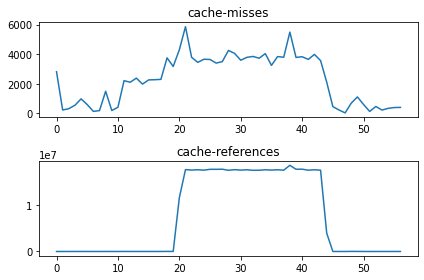

In [6]:
plot_stats(["cache-misses", "cache-references"], "fastclick-on-off.csv")

#### L1 data cache features

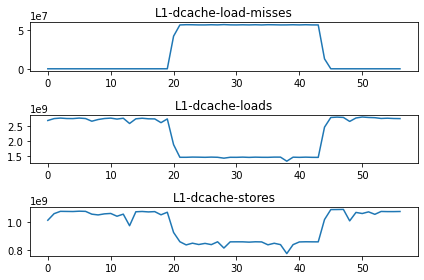

In [7]:
plot_stats(["L1-dcache-load-misses", "L1-dcache-loads", "L1-dcache-stores"], "fastclick-on-off.csv")

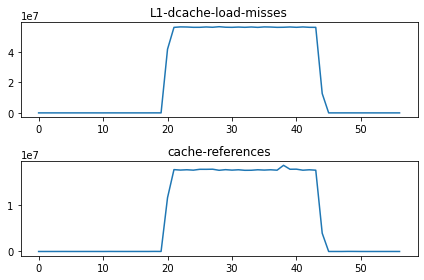

In [8]:
plot_stats(["L1-dcache-load-misses", "cache-references"], "fastclick-on-off.csv")

### TLB features

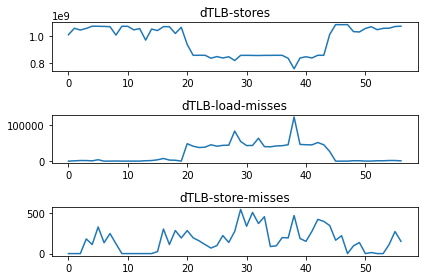

In [9]:
plot_stats(["dTLB-stores", "dTLB-load-misses", "dTLB-store-misses"], "fastclick-on-off.csv")

#### Last-Level Cache features

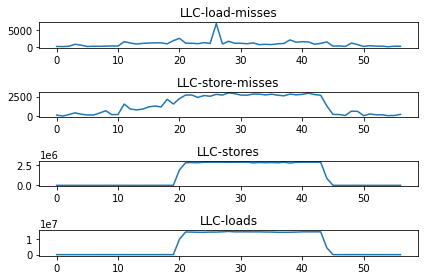

In [10]:
plot_stats(["LLC-load-misses", "LLC-store-misses", "LLC-stores", "LLC-loads"], "fastclick-on-off.csv")

## Experiment with varied CBR 64B traffic
#### Change the input traffic rate every 10 seconds: {0.74, 3.72, 7.44, 11.16, 14.88, 11.16, 7.44, 3.72, 0.74} Mpps

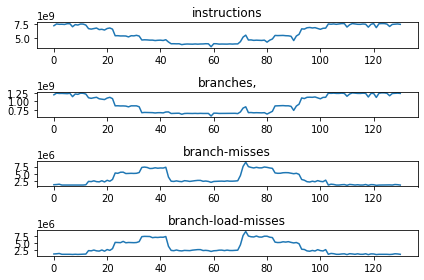

In [11]:
plot_stats(["instructions", "branches,", "branch-misses", "branch-load-misses"])

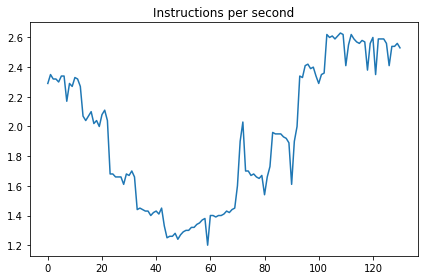

In [12]:
stat = []
with open("fastclick-varied-cbr-rates.csv") as file:
    for line in file:
        if re.search("insn per", line):
            stat.append(line.strip().split(',')[-2])
  
fig, ax = plt.subplots(1,1)
ax.plot(list(map(lambda x:float(x), stat[:-1])))
plt.title("Instructions per second")
fig.tight_layout()

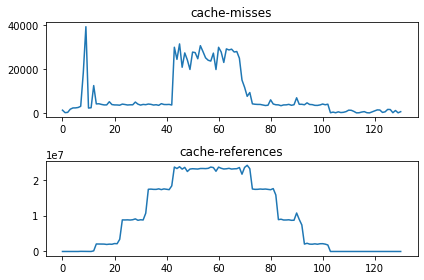

In [13]:
plot_stats(["cache-misses", "cache-references"])

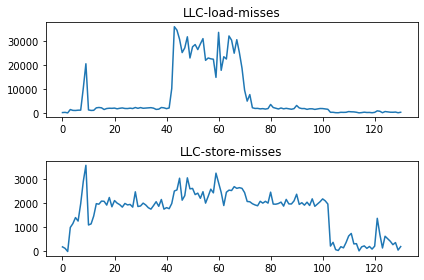

In [14]:
plot_stats(["LLC-load-misses", "LLC-store-misses"])

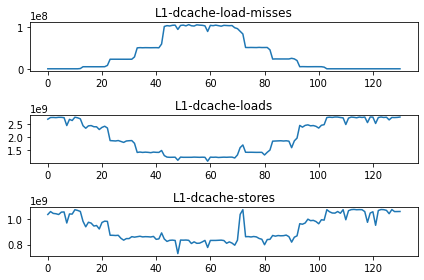

In [15]:
plot_stats(["L1-dcache-load-misses", "L1-dcache-loads", "L1-dcache-stores"])

# Imix traffic with varied injection rates

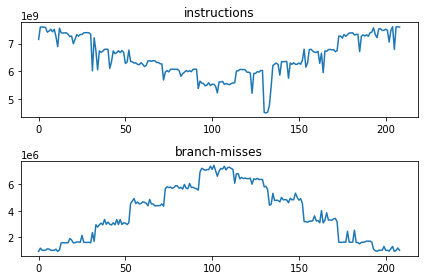

In [16]:
plot_stats(["instructions", "branch-misses"], "fastclick-varied-imix-rates.csv")

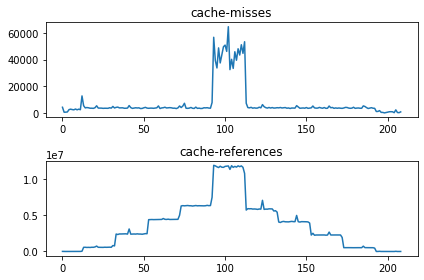

In [17]:
plot_stats(["cache-misses", "cache-references"], "fastclick-varied-imix-rates.csv")

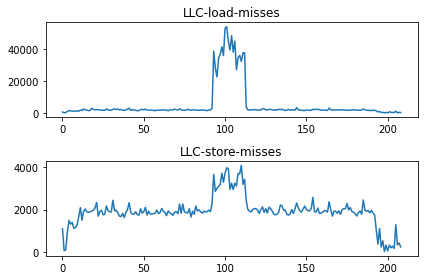

In [18]:
plot_stats(["LLC-load-misses", "LLC-store-misses"], "fastclick-varied-imix-rates.csv")

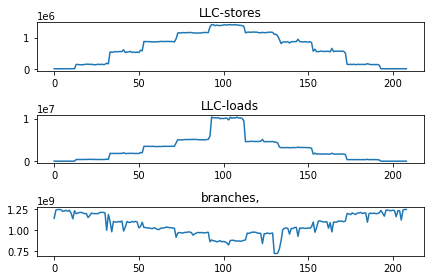

In [19]:
plot_stats(["LLC-stores", "LLC-loads", "branches,"], "fastclick-varied-imix-rates.csv")

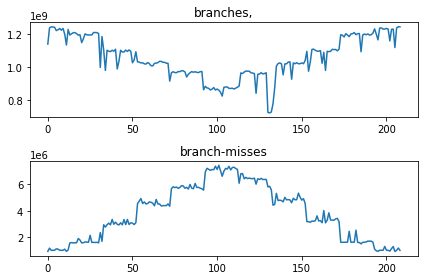

In [20]:
plot_stats(["branches,", "branch-misses"], "fastclick-varied-imix-rates.csv")

# l2fwd: Use the DPDK l2fwd application as the sample function 

## Service function chaining 
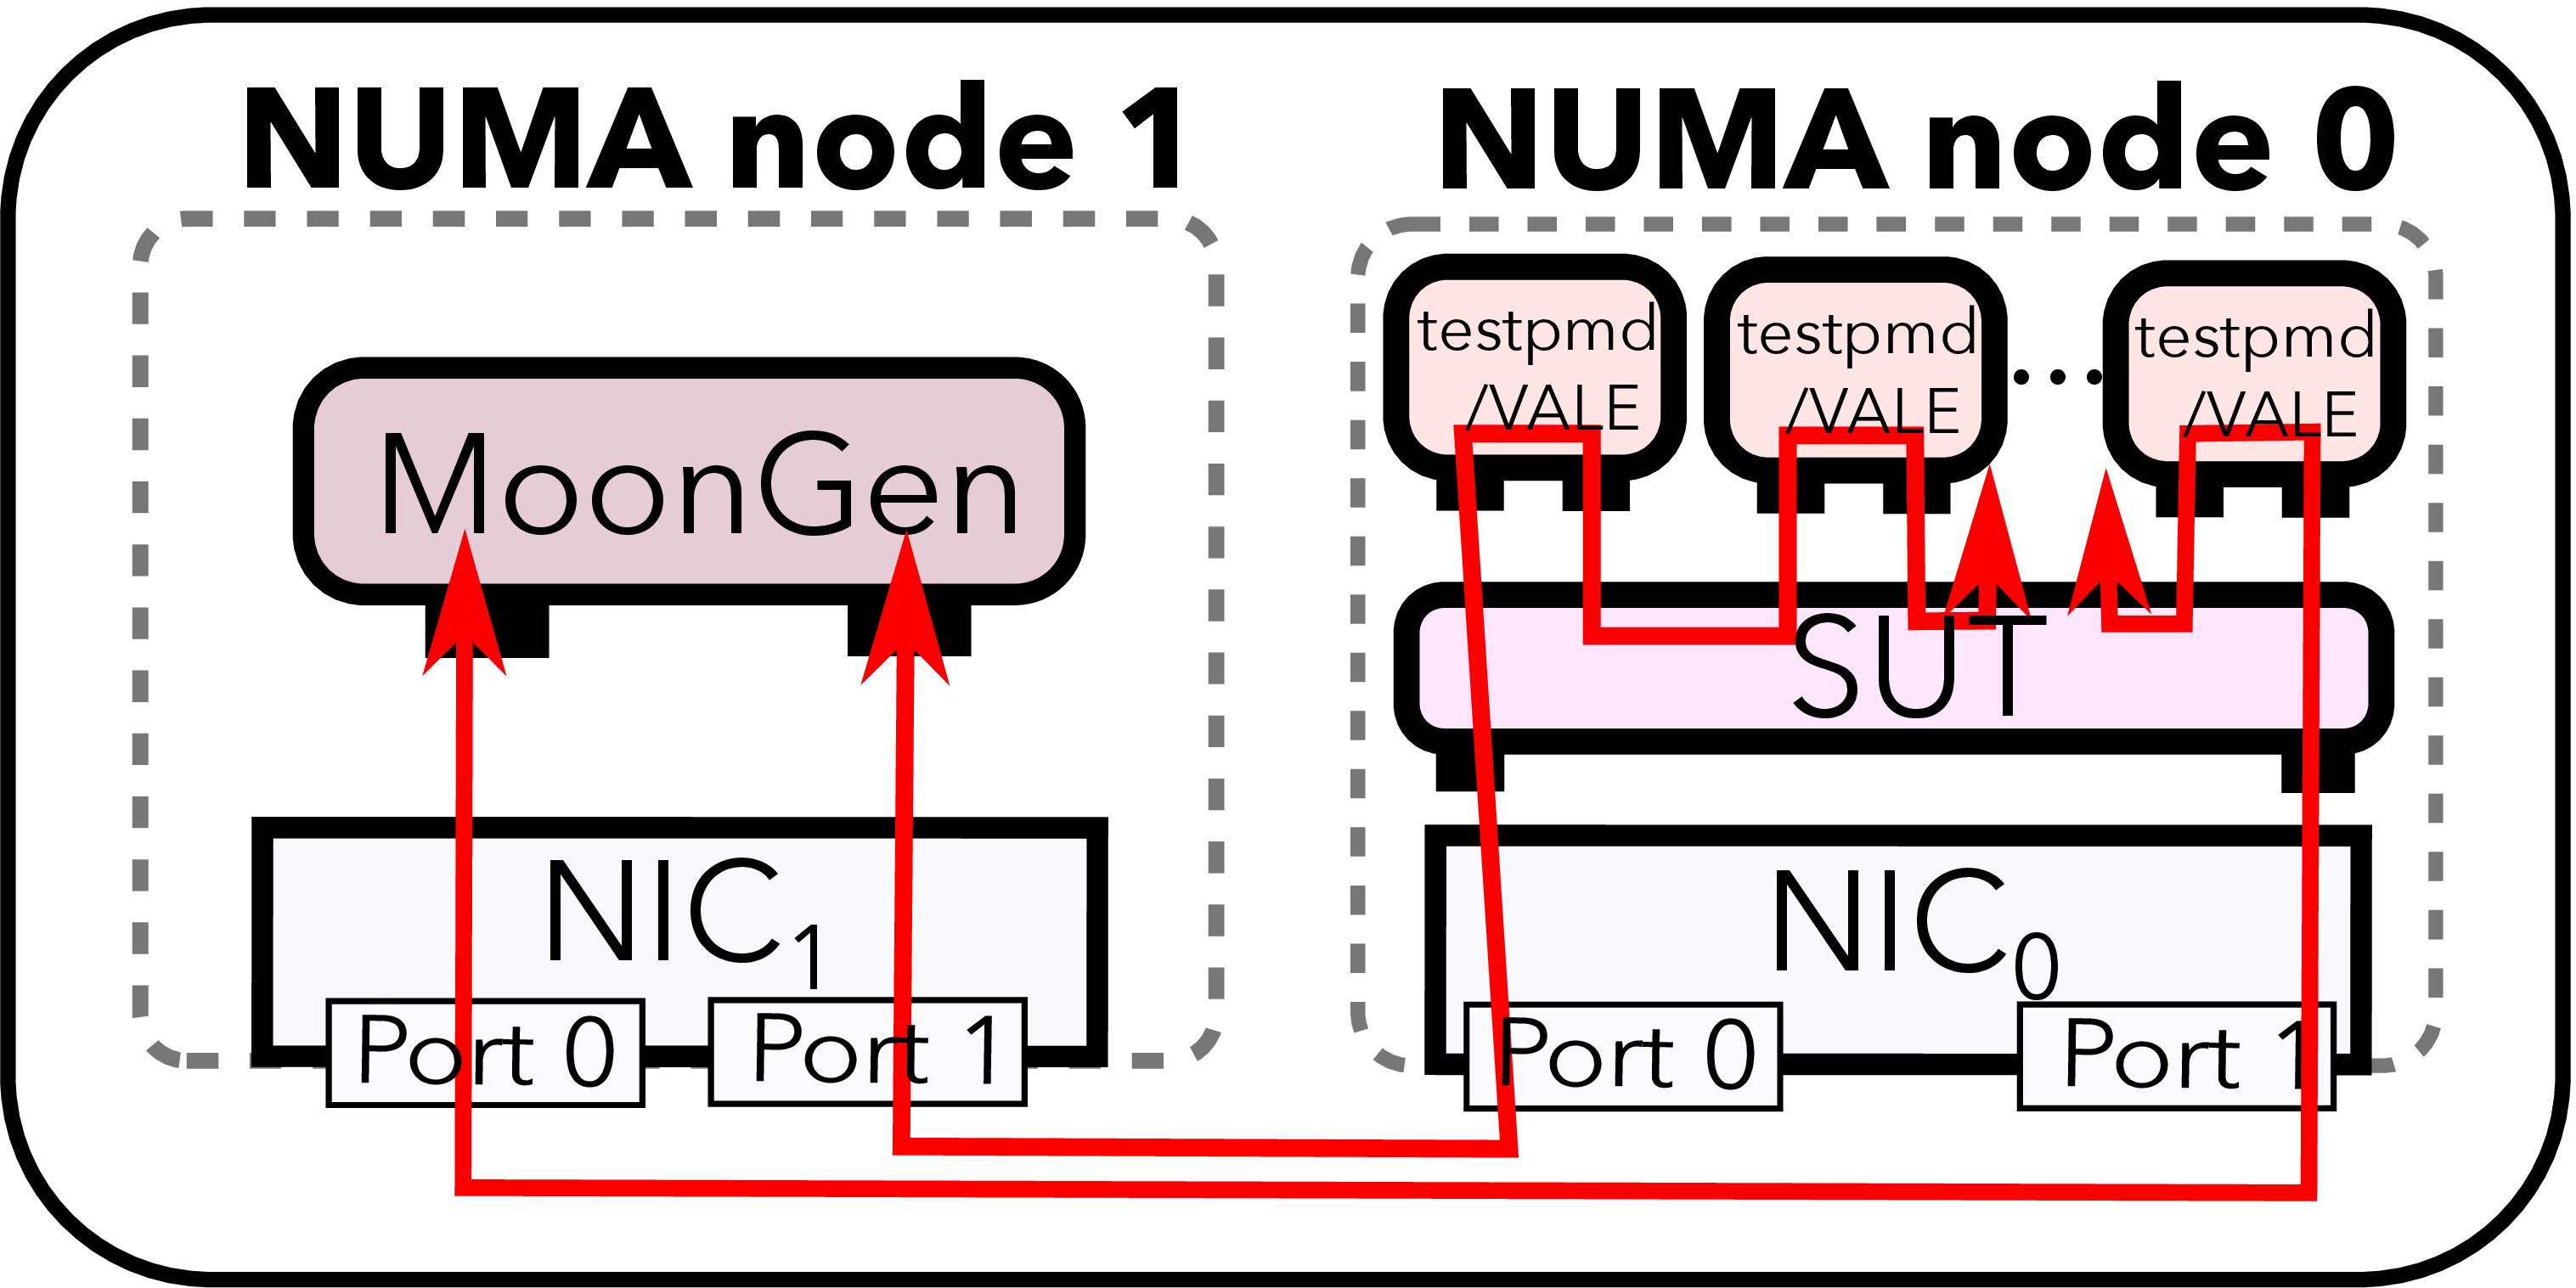

### Off-on-off experiment

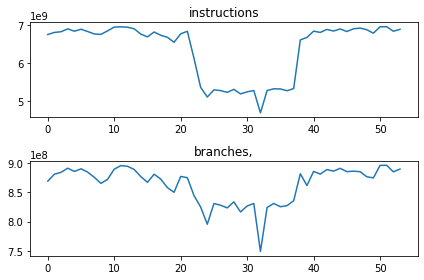

In [21]:
plot_stats(["instructions", "branches,"], "l2fwd-cbr.csv")

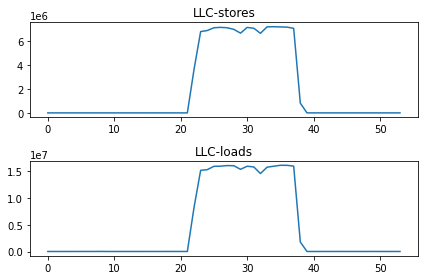

In [22]:
plot_stats(["LLC-stores", "LLC-loads",], "l2fwd-cbr.csv")

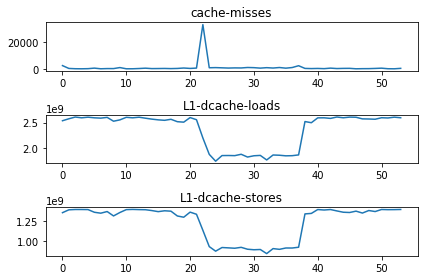

In [23]:
plot_stats(["cache-misses", "L1-dcache-loads", "L1-dcache-stores"], "l2fwd-cbr.csv")

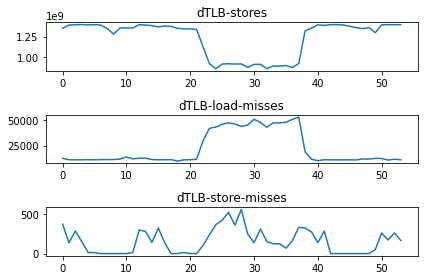

In [24]:
plot_stats(["dTLB-stores", "dTLB-load-misses", "dTLB-store-misses"], "l2fwd-cbr.csv")

### Stress testing the l2fwd 
####  During the normal execution, injecting computation-intensive task at the same worker core. 
#### Command: taskset -c 5 stress --cpu 10

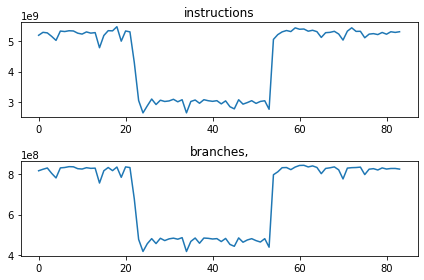

In [25]:
plot_stats(["instructions", "branches,"], "l2fwd-stress.csv")

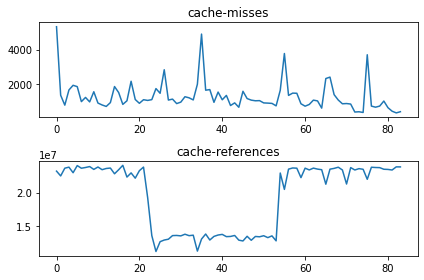

In [26]:
plot_stats(["cache-misses", "cache-references"], "l2fwd-stress.csv")

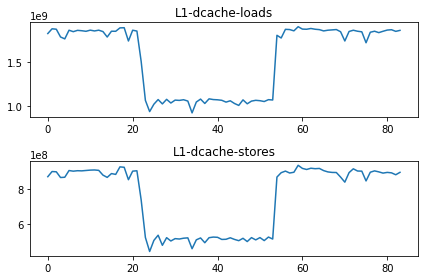

In [27]:
plot_stats(["L1-dcache-loads", "L1-dcache-stores"], "l2fwd-stress.csv")

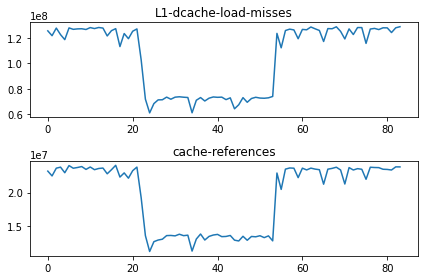

In [28]:
plot_stats(["L1-dcache-load-misses", "cache-references"], "l2fwd-stress.csv")

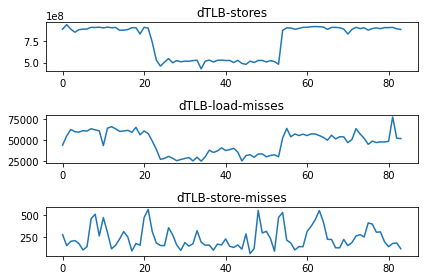

In [29]:
plot_stats(["dTLB-stores", "dTLB-load-misses", "dTLB-store-misses"], "l2fwd-stress.csv")

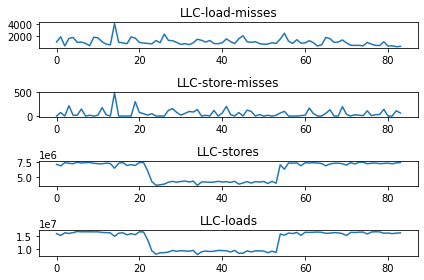

In [30]:
plot_stats(["LLC-load-misses", "LLC-store-misses", "LLC-stores", "LLC-loads"], "l2fwd-stress.csv")

### Positive Resource

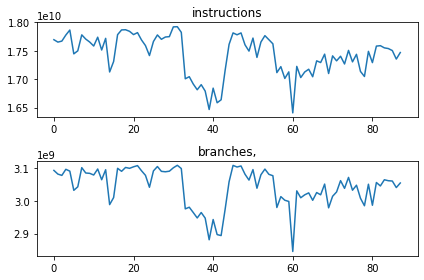

In [32]:
plot_stats(["instructions", "branches,"], "fastclick-positive-resource.csv")

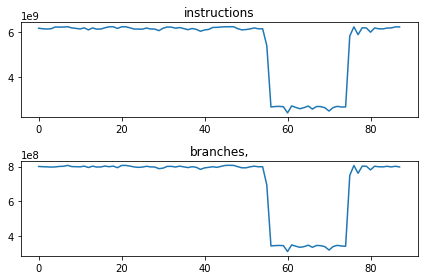

In [37]:
plot_stats(["instructions", "branches,"], "l2fwd-positive-resource.csv")

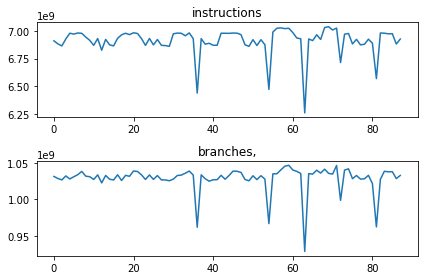

In [38]:
plot_stats(["instructions", "branches,"], "l3fwd-positive-resource.csv")

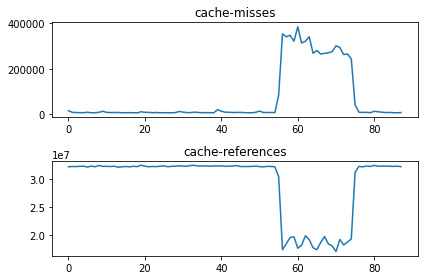

In [33]:
plot_stats(["cache-misses", "cache-references"], "fastclick-positive-resource.csv")

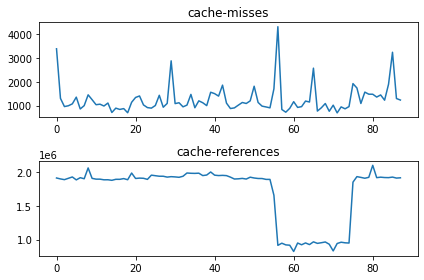

In [39]:
plot_stats(["cache-misses", "cache-references"], "l2fwd-positive-resource.csv")

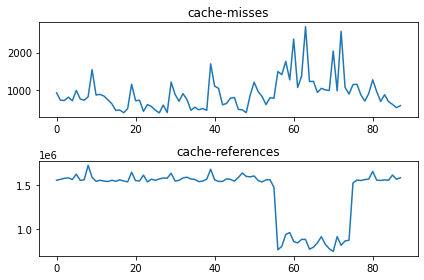

In [40]:
plot_stats(["cache-misses", "cache-references"], "l3fwd-positive-resource.csv")

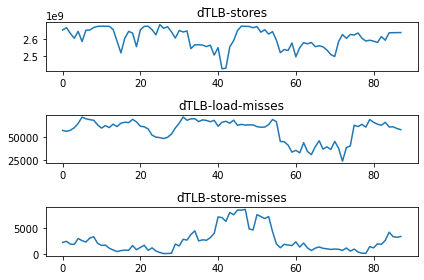

In [41]:
plot_stats(["dTLB-stores", "dTLB-load-misses", "dTLB-store-misses"], "fastclick-positive-resource.csv")

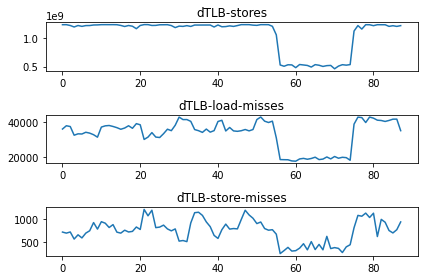

In [42]:
plot_stats(["dTLB-stores", "dTLB-load-misses", "dTLB-store-misses"], "l2fwd-positive-resource.csv")

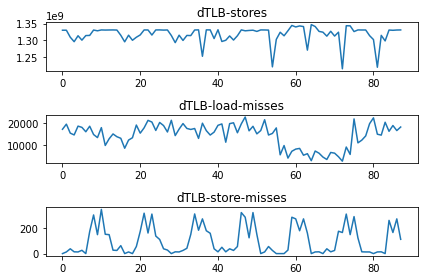

In [43]:
plot_stats(["dTLB-stores", "dTLB-load-misses", "dTLB-store-misses"], "l3fwd-positive-resource.csv")

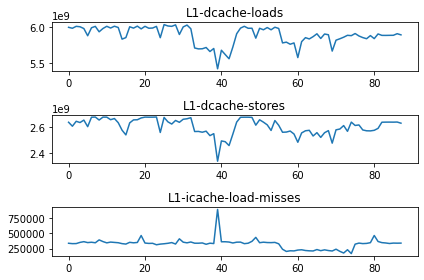

In [50]:
plot_stats(["L1-dcache-loads", "L1-dcache-stores", "L1-icache-load-misses"], "fastclick-positive-resource.csv")

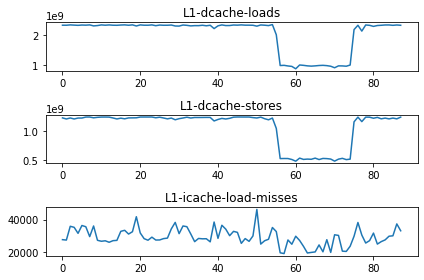

In [49]:
plot_stats(["L1-dcache-loads", "L1-dcache-stores", "L1-icache-load-misses"], "l2fwd-positive-resource.csv")

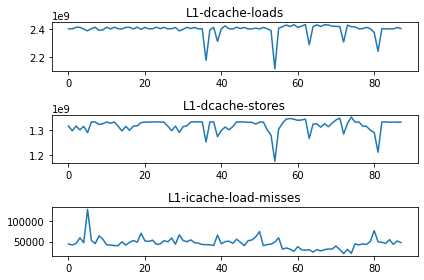

In [48]:
plot_stats(["L1-dcache-loads", "L1-dcache-stores", "L1-icache-load-misses"], "l3fwd-positive-resource.csv")

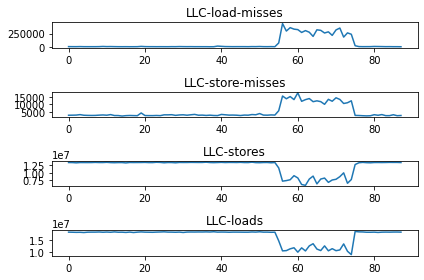

In [36]:
plot_stats(["LLC-load-misses", "LLC-store-misses", "LLC-stores", "LLC-loads"], "fastclick-positive-resource.csv")

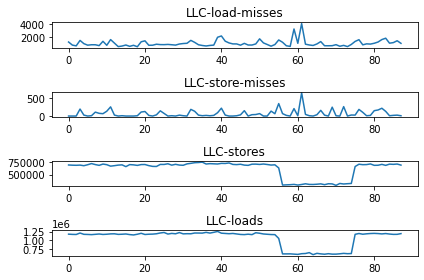

In [46]:
plot_stats(["LLC-load-misses", "LLC-store-misses", "LLC-stores", "LLC-loads"], "l2fwd-positive-resource.csv")

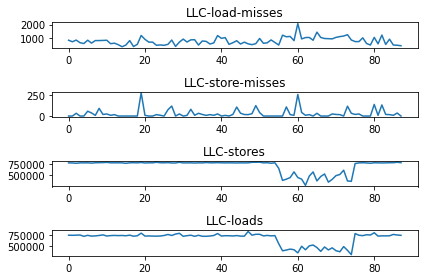

In [47]:
plot_stats(["LLC-load-misses", "LLC-store-misses", "LLC-stores", "LLC-loads"], "l3fwd-positive-resource.csv")

### Negative resource